<a href="https://colab.research.google.com/github/GirishJayakumar/University-of-Illinois-Urbana-Champaign-Research/blob/main/Student_Habits_Out_of_Classroom_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 import seaborn as sns
 from sklearn.tree import DecisionTreeClassifier
 from sklearn.model_selection import train_test_split
 from sklearn import metrics
 %matplotlib inline

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus


In [ ]:
!gdown --id 1HGU4osnnvaw9zCpWw3bAqhahXh6k82Ss
math_data = pd.read_csv("MathClass.csv")
math_data.info


Downloading...
From: https://drive.google.com/uc?id=1HGU4osnnvaw9zCpWw3bAqhahXh6k82Ss
To: /content/MathClass.csv
100% 42.0k/42.0k [00:00<00:00, 62.6MB/s]


<bound method DataFrame.info of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
390     MS   M   20       U     LE3       A  ...     5       4       11   9   9   9
391     MS   M   17       U     LE3       T  ...     4       2        3  14  16  16
392     MS   M   21       R     GT3       T  ...     3       3        3  10   8   7
393     MS   M   18       R     LE3       T  ...     4       5        0  11  12  10
394     MS   M   19       U     LE3       T 

In [ ]:
!gdown --id 1j6CBLNA5avELkGTTobMNhqjyWGv9rN-F
portu_data = pd.read_csv("PortugueseClass.csv")
portu_data.info

Downloading...
From: https://drive.google.com/uc?id=1j6CBLNA5avELkGTTobMNhqjyWGv9rN-F
To: /content/PortugueseClass.csv
100% 68.6k/68.6k [00:00<00:00, 50.4MB/s]


<bound method DataFrame.info of     school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        4   0  11  11
1       GP   F   17       U     GT3       T  ...     1       3        2   9  11  11
2       GP   F   15       U     LE3       T  ...     3       3        6  12  13  12
3       GP   F   15       U     GT3       T  ...     1       5        0  14  14  14
4       GP   F   16       U     GT3       T  ...     2       5        0  11  13  13
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T  ...     2       5        4  10  11  10
645     MS   F   18       U     LE3       T  ...     1       1        4  15  15  16
646     MS   F   18       U     GT3       T  ...     1       5        6  11  12   9
647     MS   M   17       U     LE3       T  ...     4       2        6  10  10  10
648     MS   M   18       R     LE3       T 

In [ ]:
class_data = pd.concat([math_data,portu_data],ignore_index=True)
class_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,F,19,R,GT3,T,2,3,services,other,course,mother,1,3,1,no,no,no,yes,no,yes,yes,no,5,4,2,1,2,5,4,10,11,10
1040,MS,F,18,U,LE3,T,3,1,teacher,services,course,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,3,4,1,1,1,4,15,15,16
1041,MS,F,18,U,GT3,T,1,1,other,other,course,mother,2,2,0,no,no,no,yes,yes,yes,no,no,1,1,1,1,1,5,6,11,12,9
1042,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,6,10,10,10


In [ ]:
studytime_data = math_data.loc[:,["studytime", "G3"]]
studytime_data

,studytime,G3
0,2,6
1,2,6
2,2,10
3,3,15
4,2,10
...,...,...
390,2,9
391,1,16
392,1,7
393,1,10


In [ ]:
studytime_data.dropna(axis='index',how='any', inplace=True)
studytime_data

,studytime,G3
0,2,6
1,2,6
2,2,10
3,3,15
4,2,10
...,...,...
390,2,9
391,1,16
392,1,7
393,1,10


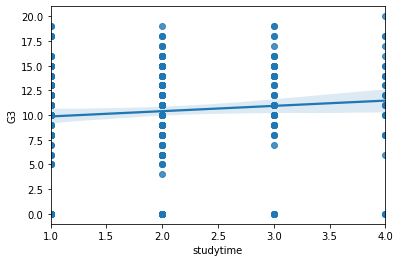

In [ ]:
sns.regplot(x="studytime", y="G3", data=studytime_data)

In [ ]:
activities_data = math_data.loc[:, ["activities", "G3"]]
activities_data

,activities,G3
0,no,6
1,no,6
2,no,10
3,yes,15
4,no,10
...,...,...
390,no,9
391,no,16
392,no,7
393,no,10


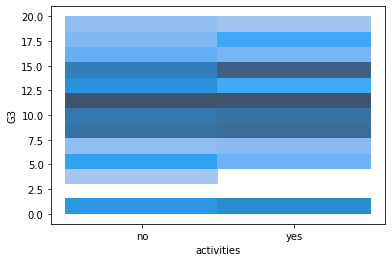

In [ ]:
sns.histplot(x = "activities", y="G3", data = activities_data)

In [ ]:
internet_data = math_data.loc[:, ["internet", "G3"]]
internet_data

,internet,G3
0,no,6
1,yes,6
2,yes,10
3,yes,15
4,no,10
...,...,...
390,no,9
391,yes,16
392,no,7
393,yes,10


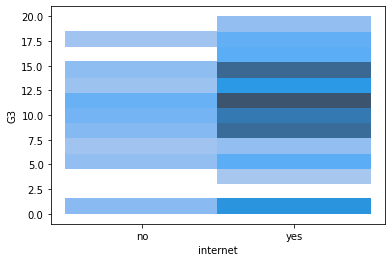

In [ ]:
sns.histplot(x = "internet", y="G3", data = internet_data)

In [ ]:
 romantic_data = math_data.loc[:, ["romantic", "G3"]]
 freetime_data = math_data.loc[:, ["freetime", "G3"]]
 walc_data = math_data.loc[:, ["Walc", "G3"]]
 dalc_data = math_data.loc[:, ["Dalc", "G3"]]
 health_data = math_data.loc[:, ["health", "G3"]]
 absences_data = math_data.loc[:, ["absences", "G3"]]
 paid_data = math_data.loc[:, ["paid", "G3"]]
 higher_data = math_data.loc[:, ["higher", "G3"]]

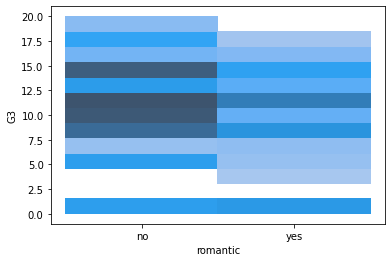

In [ ]:
sns.histplot(x = "romantic", y="G3", data = romantic_data)

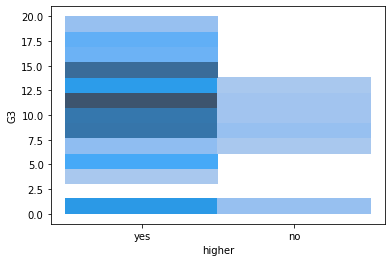

In [ ]:
sns.histplot(x = "higher", y="G3", data = higher_data)

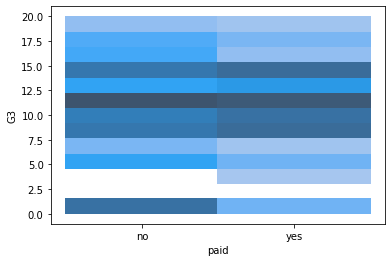

In [ ]:
sns.histplot(x = "paid", y="G3", data = paid_data)

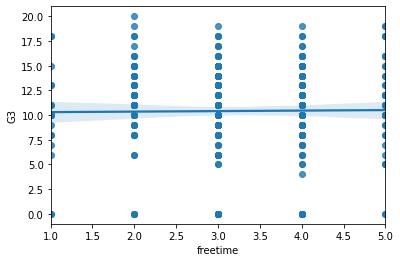

In [ ]:
sns.regplot(x="freetime", y="G3", data=freetime_data)

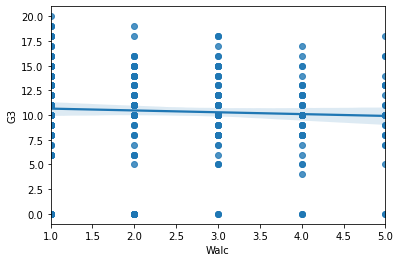

In [ ]:
sns.regplot(x="Walc", y="G3", data=walc_data)

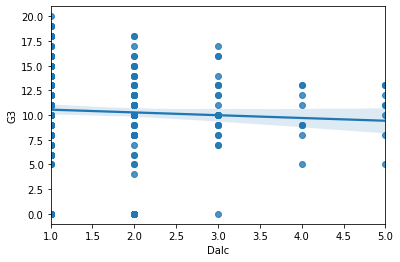

In [ ]:
sns.regplot(x="Dalc", y="G3", data=dalc_data)

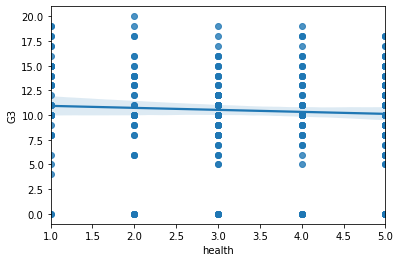

In [ ]:
sns.regplot(x="health", y="G3", data=health_data)

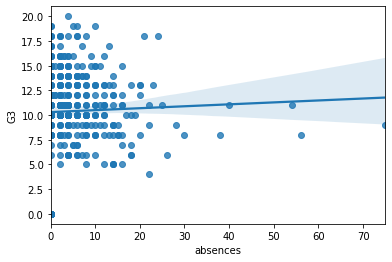

In [ ]:
sns.regplot(x="absences", y="G3", data=absences_data)

0=no
1=yes

In [ ]:
for x in range(395):
  if math_data.at[x, 'internet'] == "no":
    math_data.at[x, 'internet']=0
  elif math_data.at[x, 'internet']=="yes":
    math_data.at[x, 'internet']=1
math_data['internet'] = math_data['internet'].astype(int)
math_data['internet']

0      0
1      1
2      1
3      1
4      0
      ..
390    0
391    1
392    0
393    1
394    1
Name: internet, Length: 395, dtype: int64

In [ ]:
for x in range(395):
  if math_data.at[x, 'romantic'] == "no":
    math_data.at[x, 'romantic']=0
  elif math_data.at[x, 'romantic']=="yes":
    math_data.at[x, 'romantic']=1
math_data['romantic'] = math_data['romantic'].astype(int)
math_data['romantic']

0      0
1      0
2      0
3      1
4      0
      ..
390    0
391    0
392    0
393    0
394    0
Name: romantic, Length: 395, dtype: int64

In [ ]:
for x in range(395):
  if math_data.at[x, 'higher'] == "no":
    math_data.at[x, 'higher']=0
  elif math_data.at[x, 'higher']=="yes":
    math_data.at[x, 'higher']=1
math_data['higher'] = math_data['higher'].astype(int)
math_data['higher']

0      1
1      1
2      1
3      1
4      1
      ..
390    1
391    1
392    1
393    1
394    1
Name: higher, Length: 395, dtype: int64

In [ ]:
add_data = pd.get_dummies(pd.Series(math_data['paid']))
add_data.rename(columns = {'no':'Paid:No', 'yes': 'Paid:Yes'}, inplace=True)
math_data = pd.concat([math_data, add_data], axis=1)
math_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,Paid:No,Paid:Yes,Paid:No,Paid:Yes
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,1,0,0,4,3,4,1,1,3,6,5,6,6,1,0,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,1,1,0,5,3,3,1,1,3,4,5,5,6,1,0,1,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,1,1,0,4,3,2,2,3,3,10,7,8,10,0,1,0,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,1,1,1,3,2,2,1,1,5,2,15,14,15,0,1,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,1,0,0,4,3,2,1,2,5,4,6,10,10,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,1,0,0,5,5,4,4,5,4,11,9,9,9,0,1,0,1
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,1,1,0,2,4,5,3,4,2,3,14,16,16,1,0,1,0
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,1,0,0,5,5,3,3,3,3,3,10,8,7,1,0,1,0
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,1,1,0,4,4,1,3,4,5,0,11,12,10,1,0,1,0


Machine Learning

In [ ]:
feature_cols = ['studytime', 'freetime', 'Walc', 'Dalc', 'health', 'absences']
#'internet', 'romantic', 'higher', 'paid', ''activities'
X = math_data[feature_cols]
y = math_data.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [ ]:
D_tree = DecisionTreeClassifier(max_depth = 3)
D_tree = D_tree.fit(X_train,y_train)

In [ ]:
y_pred = D_tree.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5630252100840336


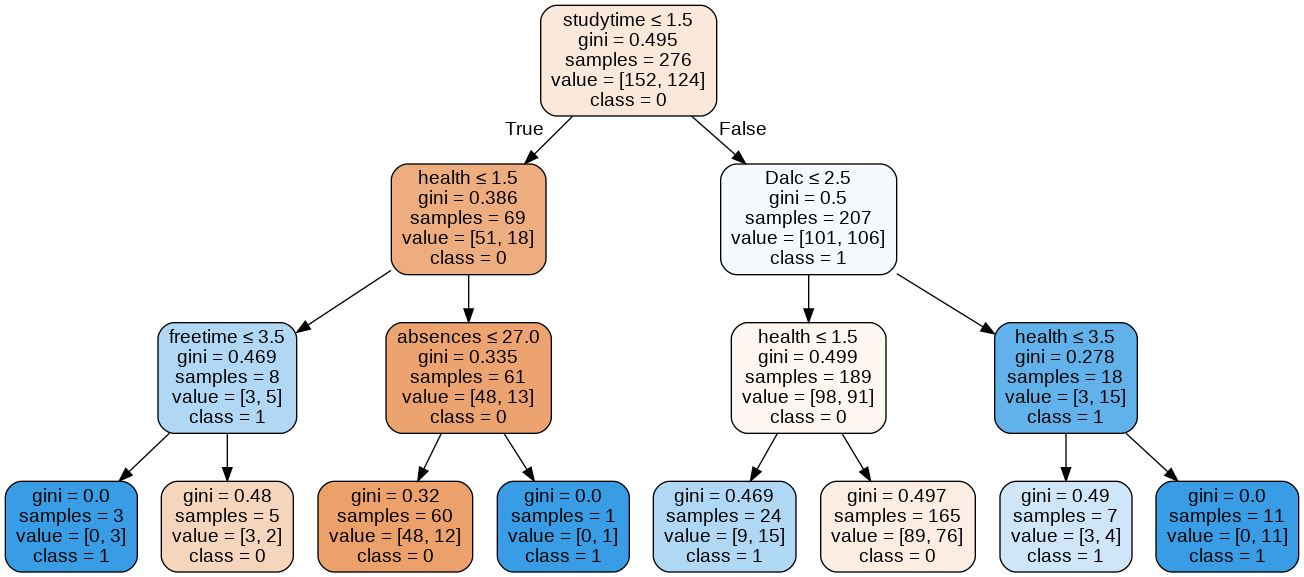

In [ ]:
dot_data = StringIO()
export_graphviz(D_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('math.png')
Image(graph.create_png())